# INTRODUCTION
URL of chosen Dataset: https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis 
</br>How this data is relevant:
- Contains information on Supply Chain on customer and item records
- This dataset contains historical data of a wide range of items and historical data
- Sufficient data columns and rows
  
### Target: 
Objective:
Forecast monthly sales quantity using a supervised regression model: Random Forest Regression trained on at least 3 years of historical data of previous sales data. The model will support inventory planning by predicting how order quantity responds to key factors such as historical sales trends, pricing, discounts, promotions and the relationship between the respective department/type.

Initial Approach: Begin with Random Forest Regression to capture nonlinear dependencies in features such as lagged sales, price, discount events, and product metadata. Explore additional models (e.g., XGBoost, Ridge Regression) based on performance benchmarks (MAPE, RMSE).

### Pain point to solve: 
Forecasting sample items and their demand so to ensure effective sample storage management through prioritising important samples and identify which samples are higher in demand.</br>
### Type of model used:
Random Forest Regression

# DATA COLLECTION

In [1]:
# Standard imports
import os

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('dataset/supplychain.csv')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# DATA PREPROCESSING AND EDA

Columns selected for data prep:
1. Order Item Quantity
3. Order Item Discount
4. Order Item Discount Rate
5. Order date (DateOrders)
6. Order Status
7. Order Country
8. Product Category Id
9. Product Name
10. Customer Segment
11. Category Name
12. Department Name


## DATA PREPARATION

In [3]:
# Keeping the desired data
df = df[['Order Item Quantity', 'Order Item Discount', 
         'Order Item Discount Rate', 'order date (DateOrders)', 'Order Status','Order Country',
         'Product Category Id', 'Product Name', 
         'Customer Segment', 'Category Name', 
         'Department Name', 'Product Price'
        ]]

#Only keeping COMPLETE order statuses
df = df[df['Order Status'] == 'COMPLETE']

#Renaming order date column
df = df.rename(columns={'order date (DateOrders)': 'Order Date'})
df

,Order Item Quantity,Order Item Discount,Order Item Discount Rate,Order Date,Order Status,Order Country,Product Category Id,Product Name,Customer Segment,Category Name,Department Name,Product Price
0,1,13.110000,0.04,1/31/2018 22:56,COMPLETE,Indonesia,73,Smart watch,Consumer,Sporting Goods,Fitness,327.750000
3,1,22.940001,0.07,1/13/2018 11:45,COMPLETE,Australia,73,Smart watch,Home Office,Sporting Goods,Fitness,327.750000
6,1,39.330002,0.12,1/13/2018 10:42,COMPLETE,China,73,Smart watch,Home Office,Sporting Goods,Fitness,327.750000
13,1,81.940002,0.25,1/13/2018 8:15,COMPLETE,India,73,Smart watch,Corporate,Sporting Goods,Fitness,327.750000
15,1,3.280000,0.01,1/13/2018 7:33,COMPLETE,India,73,Smart watch,Corporate,Sporting Goods,Fitness,327.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
180500,1,16.000000,0.04,1/16/2016 15:35,COMPLETE,Australia,45,Field & Stream Sportsman 16 Gun Fire Safe,Consumer,Fishing,Fan Shop,399.980011
180505,1,40.000000,0.10,1/16/2016 13:28,COMPLETE,China,45,Field & Stream Sportsman 16 Gun Fire Safe,Corporate,Fishing,Fan Shop,399.980011
180508,1,60.000000,0.15,1/16/2016 7:10,COMPLETE,China,45,Field & Stream Sportsman 16 Gun Fire Safe,Corporate,Fishing,Fan Shop,399.980011
180512,1,80.000000,0.20,1/16/2016 6:07,COMPLETE,China,45,Field & Stream Sportsman 16 Gun Fire Safe,Home Office,Fishing,Fan Shop,399.980011


In [4]:
df['Customer Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [5]:
df['Category Name'].value_counts()

Category Name
Cleats                  8085
Men's Footwear          7369
Women's Apparel         7036
Indoor/Outdoor Games    6348
Fishing                 5645
Water Sports            5000
Camping & Hiking        4517
Cardio Equipment        4117
Shop By Sport           3646
Electronics             1029
Accessories              609
Golf Balls               494
Girls' Apparel           383
Trade-In                 347
Golf Gloves              335
Video Games              272
Women's Clothing         218
Children's Clothing      206
Baseball & Softball      203
Hockey                   201
Cameras                  198
Golf Shoes               192
Toys                     184
Pet Supplies             173
DVDs                     160
Computers                154
Golf Apparel             153
Garden                   153
Crafts                   151
Consumer Electronics     150
Hunting & Shooting       149
Health and Beauty        136
Boxing & MMA             135
Music                    132


Showing any Missing Values

In [6]:
df.isnull().sum()

Order Item Quantity         0
Order Item Discount         0
Order Item Discount Rate    0
Order Date                  0
Order Status                0
Order Country               0
Product Category Id         0
Product Name                0
Customer Segment            0
Category Name               0
Department Name             0
Product Price               0
dtype: int64

In [7]:
#Determining the type in each column
df.dtypes

Order Item Quantity           int64
Order Item Discount         float64
Order Item Discount Rate    float64
Order Date                   object
Order Status                 object
Order Country                object
Product Category Id           int64
Product Name                 object
Customer Segment             object
Category Name                object
Department Name              object
Product Price               float64
dtype: object

### Reformatting Data

In [8]:
# Changing and formatting order date into datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df["Order Year"] = df["Order Date"].dt.year
df["Order Month"] = df["Order Date"].dt.month
df["Order Day"] = df["Order Date"].dt.dayofweek
df['Order YearMonth'] = df['Order Date'].dt.strftime('%Y-%m')

In [9]:
df.dtypes

Order Item Quantity                  int64
Order Item Discount                float64
Order Item Discount Rate           float64
Order Date                  datetime64[ns]
Order Status                        object
Order Country                       object
Product Category Id                  int64
Product Name                        object
Customer Segment                    object
Category Name                       object
Department Name                     object
Product Price                      float64
Order Year                           int32
Order Month                          int32
Order Day                            int32
Order YearMonth                     object
dtype: object

In [10]:
df['Category Name'] = df['Category Name'].str.strip()

In [11]:
df['Category Name'].unique()

array(['Sporting Goods', 'Consumer Electronics', 'Cameras', 'Computers',
       'Basketball', 'Soccer', 'Baseball & Softball', 'Electronics',
       'Cardio Equipment', "Men's Footwear", 'Cleats', "Women's Clothing",
       'Crafts', "Men's Clothing", "Women's Apparel", 'Shop By Sport',
       'Accessories', 'Trade-In', 'Hunting & Shooting',
       'Fitness Accessories', 'As Seen on  TV!', 'Strength Training',
       "Children's Clothing", 'Baby', "Girls' Apparel", 'Golf Balls',
       "Kids' Golf Clubs", 'Camping & Hiking', 'Fishing', 'Books', 'DVDs',
       'CDs', 'Garden', 'Hockey', 'Pet Supplies', 'Health and Beauty',
       'Music', 'Video Games', 'Lacrosse', 'Tennis & Racquet',
       'Boxing & MMA', 'Golf Gloves', 'Golf Bags & Carts', 'Golf Shoes',
       'Golf Apparel', "Women's Golf Clubs", "Men's Golf Clubs", 'Toys',
       'Water Sports', 'Indoor/Outdoor Games'], dtype=object)

ONLY ADDING THE SELECTED CATEGORIES

In [12]:
# List of categories to keep
important_categories = [
    'Cleats',
    "Men's Footwear",
    "Women's Apparel",
    'Electronics',
    'Video Games',
    'Cameras',
    'Computers',
    'Cardio Equipment',
    'Indoor/Outdoor Games',
    'Water Sports',
    'Shop By Sport',
    'Camping & Hiking',
    'Fishing',
    'Garden',
    'Pet Supplies'
]

# Filter the DataFrame to only keep rows with these categories
df = df[df['Category Name'].isin(important_categories)].copy()

# Check the number of unique remaining categories
print(df['Category Name'].unique())

['Cameras' 'Computers' 'Electronics' 'Cardio Equipment' "Men's Footwear"
 'Cleats' "Women's Apparel" 'Shop By Sport' 'Camping & Hiking' 'Fishing'
 'Garden' 'Pet Supplies' 'Video Games' 'Water Sports'
 'Indoor/Outdoor Games']


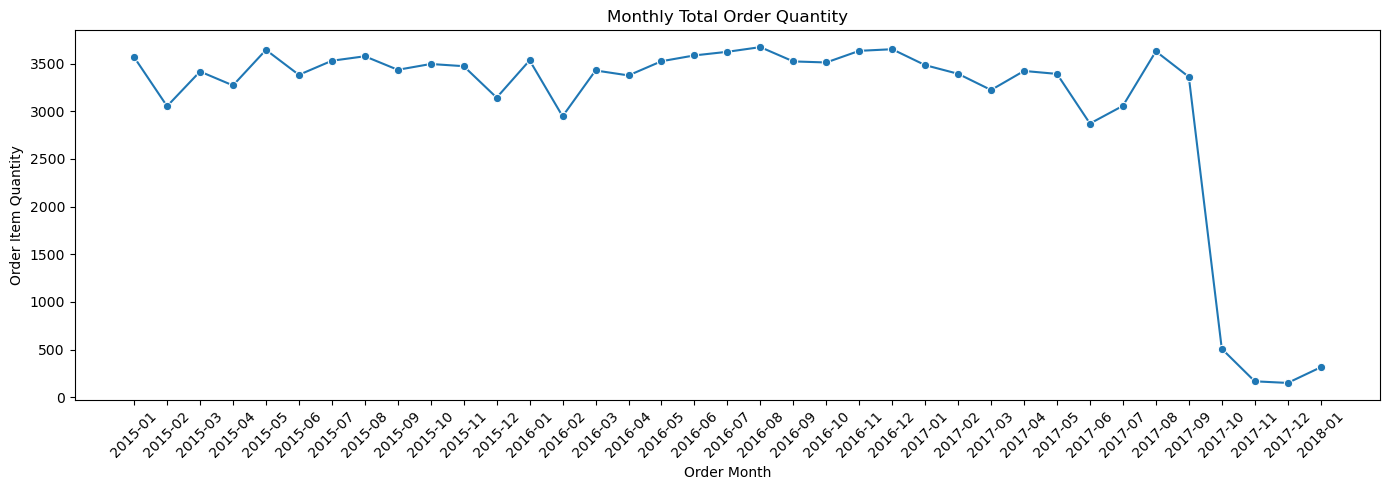

In [13]:
df['Order Month'] = df['Order Date'].dt.to_period('M').astype(str)

monthly_orders = df.groupby('Order Month')['Order Item Quantity'].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_orders, x='Order Month', y='Order Item Quantity', marker='o')
plt.title('Monthly Total Order Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# MODELLING
Type of model used: Linear Regression

### Feature Engineering

#### Deciding on useful features for predictions

NOTE ON THE OBJECTIVE AGAIN:
I want to forecast the total amount of samples sold per category for each month (Total quantity per category per month)


In [14]:
df.head()

,Order Item Quantity,Order Item Discount,Order Item Discount Rate,Order Date,Order Status,Order Country,Product Category Id,Product Name,Customer Segment,Category Name,Department Name,Product Price,Order Year,Order Month,Order Day,Order YearMonth
146,1,4.520000,0.01,2017-10-14 11:42:00,COMPLETE,Alemania,62,Web Camera,Consumer,Cameras,Technology,452.040008,2017,2017-10,5,2017-10
148,1,9.040000,0.02,2017-10-16 01:12:00,COMPLETE,Alemania,62,Web Camera,Consumer,Cameras,Technology,452.040008,2017,2017-10,0,2017-10
150,1,18.080000,0.04,2017-10-13 03:08:00,COMPLETE,Italia,62,Web Camera,Consumer,Cameras,Technology,452.040008,2017,2017-10,4,2017-10
152,1,82.500000,0.06,2017-10-29 12:55:00,COMPLETE,Reino Unido,64,Dell Laptop,Consumer,Computers,Technology,1500.000000,2017,2017-10,6,2017-10
153,1,24.860001,0.06,2017-10-13 08:44:00,COMPLETE,Francia,62,Web Camera,Consumer,Cameras,Technology,452.040008,2017,2017-10,4,2017-10


In [15]:
df = df.drop(columns=['Product Name','Department Name','Order Status','Product Category Id','Order Country'])

#### Calculating total quantity, order frequency and average quantity per order for each category

In [16]:
# Calculating the average number of products sold per category
category_totals = df.groupby('Category Name')['Order Item Quantity'].sum().reset_index()
category_totals.columns = ['Category Name', 'Total Quantity Ordered (Per Category)']
unique_value_count = df['Category Name'].value_counts()

category_frequency = unique_value_count.reset_index()
category_frequency.columns = ['Category Name', 'Order Frequency']
category_summary = pd.merge(category_totals, category_frequency, on='Category Name')
category_summary['Avg Quantity per Order'] = category_summary['Total Quantity Ordered (Per Category)'] / category_summary['Order Frequency']

category_summary

,Category Name,Total Quantity Ordered (Per Category),Order Frequency,Avg Quantity per Order
0,Cameras,198,198,1.000000
1,Camping & Hiking,4517,4517,1.000000
2,Cardio Equipment,12364,4117,3.003158
3,Cleats,24377,8085,3.015090
4,Computers,154,154,1.000000
5,Electronics,3098,1029,3.010690
6,Fishing,5645,5645,1.000000
7,Garden,153,153,1.000000
8,Indoor/Outdoor Games,18967,6348,2.987870
9,Men's Footwear,7369,7369,1.000000


In [17]:
df = df.merge( category_summary[['Category Name', 'Total Quantity Ordered (Per Category)', 'Order Frequency', 'Avg Quantity per Order']],
    on='Category Name',
    how='left')
df.head()

,Order Item Quantity,Order Item Discount,Order Item Discount Rate,Order Date,Customer Segment,Category Name,Product Price,Order Year,Order Month,Order Day,Order YearMonth,Total Quantity Ordered (Per Category),Order Frequency,Avg Quantity per Order
0,1,4.520000,0.01,2017-10-14 11:42:00,Consumer,Cameras,452.040008,2017,2017-10,5,2017-10,198,198,1.0
1,1,9.040000,0.02,2017-10-16 01:12:00,Consumer,Cameras,452.040008,2017,2017-10,0,2017-10,198,198,1.0
2,1,18.080000,0.04,2017-10-13 03:08:00,Consumer,Cameras,452.040008,2017,2017-10,4,2017-10,198,198,1.0
3,1,82.500000,0.06,2017-10-29 12:55:00,Consumer,Computers,1500.000000,2017,2017-10,6,2017-10,154,154,1.0
4,1,24.860001,0.06,2017-10-13 08:44:00,Consumer,Cameras,452.040008,2017,2017-10,4,2017-10,198,198,1.0


In [18]:
df['Total Sales'] = df['Order Item Quantity'] * df['Product Price']

# Then group by Category and YearMonth
monthly_sales = df.groupby(['Category Name', 'Order YearMonth']).agg({
    'Order Item Quantity': 'sum',
    'Total Sales': 'sum'
}).reset_index()

monthly_sales

,Category Name,Order YearMonth,Order Item Quantity,Total Sales
0,Cameras,2017-10,195,88147.801657
1,Cameras,2017-12,3,1356.120025
2,Camping & Hiking,2015-01,132,39597.361452
3,Camping & Hiking,2015-02,124,37197.521364
4,Camping & Hiking,2015-03,121,36297.581331
...,...,...,...,...
340,Women's Apparel,2017-06,567,28350.000000
341,Women's Apparel,2017-07,580,29000.000000
342,Women's Apparel,2017-08,743,37150.000000
343,Women's Apparel,2017-09,582,29100.000000


#### Final Features

In [19]:
# Fix: Merge on both Category Name AND Order YearMonth to properly match records
df = df.merge(monthly_sales[['Category Name', 'Order YearMonth', 'Order Item Quantity', 'Total Sales']], 
              on=['Category Name', 'Order YearMonth'], 
              how='left',
              suffixes=('', '_Monthly'))

# Rename the merged columns for clarity
df = df.rename(columns={
    'Order Item Quantity_Monthly': 'Monthly_Quantity_Sold',
    'Total Sales': 'Monthly_Total_Sales'
})

df.head()

,Order Item Quantity,Order Item Discount,Order Item Discount Rate,Order Date,Customer Segment,Category Name,Product Price,Order Year,Order Month,Order Day,Order YearMonth,Total Quantity Ordered (Per Category),Order Frequency,Avg Quantity per Order,Monthly_Total_Sales,Monthly_Quantity_Sold,Total Sales_Monthly
0,1,4.520000,0.01,2017-10-14 11:42:00,Consumer,Cameras,452.040008,2017,2017-10,5,2017-10,198,198,1.0,452.040008,195,88147.801657
1,1,9.040000,0.02,2017-10-16 01:12:00,Consumer,Cameras,452.040008,2017,2017-10,0,2017-10,198,198,1.0,452.040008,195,88147.801657
2,1,18.080000,0.04,2017-10-13 03:08:00,Consumer,Cameras,452.040008,2017,2017-10,4,2017-10,198,198,1.0,452.040008,195,88147.801657
3,1,82.500000,0.06,2017-10-29 12:55:00,Consumer,Computers,1500.000000,2017,2017-10,6,2017-10,154,154,1.0,1500.000000,124,186000.000000
4,1,24.860001,0.06,2017-10-13 08:44:00,Consumer,Cameras,452.040008,2017,2017-10,4,2017-10,198,198,1.0,452.040008,195,88147.801657


In [20]:
# Keeping only relevant columns for the model
df = df.drop(columns=['Order Item Quantity', 'Order Day', 'Order Date','Order Frequency',
                       'Avg Quantity per Order', 'Order Year',
                        'Order Month', 'Order Item Discount','Total Quantity Ordered (Per Category)',
                        'Monthly_Total_Sales'])
df = df.groupby(['Order YearMonth', 'Category Name']).agg({
    'Product Price': 'mean',                 # Average price per category-month
    'Customer Segment': 'first',                # Dominant segment   
    'Order Item Discount Rate': 'mean',         # Average discount rate
    'Monthly_Quantity_Sold': 'first'            # Target (already aggregated)
}).reset_index()
df = df.rename(columns={'Product Price': 'Average Product Price'})
df.head()

,Order YearMonth,Category Name,Average Product Price,Customer Segment,Order Item Discount Rate,Monthly_Quantity_Sold
0,2015-01,Camping & Hiking,299.980011,Consumer,0.107348,132
1,2015-01,Cardio Equipment,98.960733,Consumer,0.099632,386
2,2015-01,Cleats,59.990002,Consumer,0.096679,787
3,2015-01,Electronics,39.617908,Consumer,0.093023,134
4,2015-01,Fishing,399.980011,Consumer,0.094719,178


#### Adding Time Series

In [21]:
# Use your existing df (the one with Monthly_Quantity_Sold)
print(f"Starting with df shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Convert Order YearMonth to datetime for feature extraction
df['Order_Date'] = pd.to_datetime(df['Order YearMonth'])

# Extract numerical time features that can handle future dates
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Quarter'] = df['Order_Date'].dt.quarter

# Create trend feature (months since the start of data)
start_date = df['Order_Date'].min()
df['Months_Since_Start'] = ((df['Order_Date'] - start_date).dt.days / 30.44).round().astype(int)

# Create cyclical features for seasonality (important for forecasting!)
df['Month_Sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_Cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Create year trend (helps with long-term patterns)
df['Year_Trend'] = df['Year'] - df['Year'].min()


# IMPORTANT: Define reference date BEFORE dropping Order YearMonth
reference_date = pd.to_datetime(df['Order YearMonth'].min())
print(f"✅ Reference date set to: {reference_date}")
print(f"Data spans from {df['Order YearMonth'].min()} to {df['Order YearMonth'].max()}")

# Drop the original time columns we don't need
df = df.drop(columns=['Order YearMonth', 'Order_Date'])

Starting with df shape: (345, 6)
Columns: ['Order YearMonth', 'Category Name', 'Average Product Price', 'Customer Segment', 'Order Item Discount Rate', 'Monthly_Quantity_Sold']
✅ Reference date set to: 2015-01-01 00:00:00
Data spans from 2015-01 to 2018-01


#### Encoding Features

In [22]:
# Only encode truly categorical features (not time!)
df_encoded = df

# Label encode Category Name
le_category = LabelEncoder()
df_encoded['Category Name'] = le_category.fit_transform(df_encoded['Category Name'])

# One-hot encode Customer Segment
df_encoded = pd.get_dummies(df_encoded, columns=['Customer Segment'], drop_first=True)

#### X and y test 

In [23]:
# Separate features and target
X_timeseries = df_encoded.drop(columns=['Monthly_Quantity_Sold'])
y_timeseries = df_encoded['Monthly_Quantity_Sold']

print(f"Features shape: {X_timeseries.shape}")
print(f"Target shape: {y_timeseries.shape}")

print(f"\nFeature columns:")
for i, col in enumerate(X_timeseries.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nTime-related features:")
time_features = ['Year', 'Month', 'Quarter', 'Months_Since_Start', 'Month_Sin', 'Month_Cos', 'Year_Trend']
for feature in time_features:
    if feature in X_timeseries.columns:
        print(f"✅ {feature}")

print(f"\nBusiness features:")
business_features = ['Category Name', 'Average Product Price', 'Order Item Discount Rate']
for feature in business_features:
    if feature in X_timeseries.columns:
        print(f"✅ {feature}")

Features shape: (345, 12)
Target shape: (345,)

Feature columns:
 1. Category Name
 2. Average Product Price
 3. Order Item Discount Rate
 4. Year
 5. Month
 6. Quarter
 7. Months_Since_Start
 8. Month_Sin
 9. Month_Cos
10. Year_Trend
11. Customer Segment_Corporate
12. Customer Segment_Home Office

Time-related features:
✅ Year
✅ Month
✅ Quarter
✅ Months_Since_Start
✅ Month_Sin
✅ Month_Cos
✅ Year_Trend

Business features:
✅ Category Name
✅ Average Product Price
✅ Order Item Discount Rate


#### Model Training

In [24]:
import xgboost as xgb
# Split the data
X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(
    X_timeseries, y_timeseries, test_size=0.2, random_state=42
)

print(f"Training set: {X_train_ts.shape}")
print(f"Test set: {X_test_ts.shape}")

# Train XGBoost model optimized for time series
model_timeseries = xgb.XGBRegressor(
    n_estimators=500,
    max_depth= 10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    reg_alpha=0.1,
    reg_lambda=0.5
)

model_timeseries.fit(
    X_train_ts, y_train_ts,
    eval_set=[(X_test_ts, y_test_ts)],
    verbose=False
)

# Make predictions
y_pred_ts = model_timeseries.predict(X_test_ts)

# Evaluate performance
r2_ts = r2_score(y_test_ts, y_pred_ts)
rmse_ts = np.sqrt(mean_squared_error(y_test_ts, y_pred_ts))
mae_ts = mean_absolute_error(y_test_ts, y_pred_ts)
mape_ts = np.mean(np.abs((y_test_ts - y_pred_ts) / y_test_ts)) * 100
print(f"R² Score: {r2_ts:.4f}")
print(f"RMSE: {rmse_ts:.2f}")
print(f"MAE: {mae_ts:.2f}")
print(f"MAPE: {mape_ts:.2f}%")

# Cross-validation
cv_scores_ts = cross_val_score(model_timeseries, X_timeseries, y_timeseries, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores_ts}")
print(f"Mean CV R²: {cv_scores_ts.mean():.4f} (+/- {cv_scores_ts.std() * 2:.4f})")

Training set: (276, 12)
Test set: (69, 12)
R² Score: 0.8973
RMSE: 72.27
MAE: 41.43
MAPE: 56.36%
Cross-validation R² scores: [0.968795   0.95205939 0.9567672  0.96046191 0.27560031]
Mean CV R²: 0.8227 (+/- 0.5472)


_Category Mapping: Assigning the category to the general category_

In [25]:
# This assigns the category to the generalized category
category_mapping = {
    "Clothing": ["Cleats", "Men's Footwear", "Women's Apparel"],
    "Technology": ["Electronics", "Computers", "Cameras", "Video Games"],
    "Sports and Fitness": ["Cardio Equipment", "Shop By Sport", "Camping & Hiking", 
                          "Fishing", "Water Sports", "Indoor/Outdoor Games"],
    "Other": ["Garden", "Pet Supplies"]
}

def create_category_mapping():
    # Create reverse mapping for validation
    # Assigns the general category to the specific category and puts it in a dictionary
    specific_to_general = {}
    for general_cat, specific_cats in category_mapping.items():
        for specific_cat in specific_cats:
            specific_to_general[specific_cat] = general_cat
    
    return category_mapping, specific_to_general

category_mapping, specific_to_general = create_category_mapping()

_Updating the future forecasting demand_

In [26]:
# This is the updated forecast demand
def forecast_future_demand(model, le_category, reference_date, future_year_month, 
                          category_name, avg_price, customer_segment, discount_rate):
    # Parse the future date
    future_date = pd.to_datetime(future_year_month)
    
    # Calculate time features for the future date
    months_since_start = ((future_date - reference_date).days / 30.44)
    
    # Create test data with numerical time features (removed Product Category Id)
    test_data = {
        'Category Name': category_name,
        'Average Product Price': avg_price,
        'Customer Segment': customer_segment,
        'Order Item Discount Rate': discount_rate,
        # Time features (numerical - can handle ANY future date!)
        'Year': future_date.year,
        'Month': future_date.month,
        'Quarter': future_date.quarter,
        'Months_Since_Start': int(months_since_start),
        'Month_Sin': np.sin(2 * np.pi * future_date.month / 12),
        'Month_Cos': np.cos(2 * np.pi * future_date.month / 12),
        'Year_Trend': future_date.year - reference_date.year
    }
    
    # Create DataFrame
    test_df = pd.DataFrame([test_data])
    
    # Handle unknown category
    if category_name not in le_category.classes_:
        print(f"Unknown category '{category_name}' - using default: {le_category.classes_[0]}")
        test_df['Category Name'] = le_category.classes_[0]
    
    # Encode category
    test_df['Category Name'] = le_category.transform(test_df['Category Name'])
    
    # One-hot encode customer segment
    test_df = pd.get_dummies(test_df, columns=['Customer Segment'], drop_first=True)
    
    # Ensure same columns as training (crucial!)
    test_df = test_df.reindex(columns=X_timeseries.columns, fill_value=0)
    
    # Make prediction
    prediction = model.predict(test_df)[0]
    
    print(f"FORECAST for {future_year_month}: {prediction:.2f} units")
    print(f"Category: {category_name}")
    print(f"Features used: {test_df.iloc[0].to_dict()}")
    
    return prediction

_Forecast demand for a generalized category by aggregating predictions from all its specific subcategories_

In [27]:
def forecast_generalized_category(model, le_category, reference_date, future_year_month,
                                generalized_category, avg_price, customer_segment, discount_rate, category_mapping):
    if generalized_category not in category_mapping:
        raise ValueError(f"Unknown generalized category: {generalized_category}")
    
    specific_categories = category_mapping[generalized_category]
    predictions = []
    valid_predictions = []
    
    print(f"\n🔮 Forecasting for {generalized_category}")
    print(f"📋 Subcategories: {specific_categories}")
    print("="*50)
    
    for specific_cat in specific_categories:
        try:
            # Check if specific category exists in trained model
            if specific_cat in le_category.classes_:
                prediction = forecast_future_demand(
                    model=model,
                    le_category=le_category,
                    reference_date=reference_date,
                    future_year_month=future_year_month,
                    category_name=specific_cat,
                    avg_price=avg_price,
                    customer_segment=customer_segment,
                    discount_rate=discount_rate
                )
                predictions.append({
                    'category': specific_cat,
                    'prediction': prediction
                })
                valid_predictions.append(prediction)
                print(f"✅ {specific_cat}: {prediction:.2f} units")
            else:
                print(f"⚠️  {specific_cat}: Not in trained categories, skipping")
                
        except Exception as e:
            print(f"❌ {specific_cat}: Error - {e}")
    
    if not valid_predictions:
        raise ValueError(f"No valid predictions for {generalized_category}")
    
    # Calculate aggregated metrics
    total_prediction = sum(valid_predictions)
    mean_prediction = total_prediction / len(valid_predictions)
    
    print("="*50)
    print(f"📊 AGGREGATED RESULTS for {generalized_category}:")
    print(f"   • Total predicted demand: {total_prediction:.2f} units")
    print(f"   • Average per subcategory: {mean_prediction:.2f} units")
    print(f"   • Number of subcategories: {len(valid_predictions)}")
    
    return {
        'generalized_category': generalized_category,
        'total_prediction': total_prediction,
        'mean_prediction': mean_prediction,
        'subcategory_predictions': predictions,
        'num_subcategories': len(valid_predictions)
    }

#### Testing

In [28]:
# Update your testing cell

def test_generalized_forecasting():
    """Test the generalized category forecasting system"""
    
    test_scenarios = [
        {
            'future_date': '2025-03',
            'generalized_category': 'Clothing',
            'description': 'March 2025 Clothing forecast'
        },
        {
            'future_date': '2025-06',
            'generalized_category': 'Technology',
            'description': 'June 2025 Technology forecast'
        },
        {
            'future_date': '2026-12',
            'generalized_category': 'Sports and Fitness',
            'description': 'December 2026 Sports & Fitness forecast'
        }
    ]
    
    print("🚀 GENERALIZED CATEGORY FORECASTING")
    print("="*60)
    
    for scenario in test_scenarios:
        try:
            print(f"\n📅 {scenario['description']}")
            
            result = forecast_generalized_category(
                model=model_timeseries,
                le_category=le_category,
                reference_date=reference_date,
                future_year_month=scenario['future_date'],
                generalized_category=scenario['generalized_category'],
                avg_price=25.50,
                customer_segment='Consumer',
                discount_rate=0.08,
                category_mapping=category_mapping
            )
            
            print(f"✅ SUCCESS: {result['total_prediction']:.2f} total units predicted")
            
        except Exception as e:
            print(f"❌ Error: {e}")
        
        print("\n" + "="*60)

# Run the test
test_generalized_forecasting()

🚀 GENERALIZED CATEGORY FORECASTING

📅 March 2025 Clothing forecast

🔮 Forecasting for Clothing
📋 Subcategories: ['Cleats', "Men's Footwear", "Women's Apparel"]
FORECAST for 2025-03: 176.23 units
Category: Cleats
Features used: {'Category Name': 3.0, 'Average Product Price': 25.5, 'Order Item Discount Rate': 0.08, 'Year': 2025.0, 'Month': 3.0, 'Quarter': 1.0, 'Months_Since_Start': 121.0, 'Month_Sin': 1.0, 'Month_Cos': 6.123233995736766e-17, 'Year_Trend': 10.0, 'Customer Segment_Corporate': 0.0, 'Customer Segment_Home Office': 0.0}
✅ Cleats: 176.23 units
FORECAST for 2025-03: 187.73 units
Category: Men's Footwear
Features used: {'Category Name': 9.0, 'Average Product Price': 25.5, 'Order Item Discount Rate': 0.08, 'Year': 2025.0, 'Month': 3.0, 'Quarter': 1.0, 'Months_Since_Start': 121.0, 'Month_Sin': 1.0, 'Month_Cos': 6.123233995736766e-17, 'Year_Trend': 10.0, 'Customer Segment_Corporate': 0.0, 'Customer Segment_Home Office': 0.0}
✅ Men's Footwear: 187.73 units
FORECAST for 2025-03: 295.

#### Feature Importance

TOP 10 MOST IMPORTANT FEATURES:
                    Feature  Importance
1     Average Product Price    0.610131
0             Category Name    0.266791
2  Order Item Discount Rate    0.041621
6        Months_Since_Start    0.039435
5                   Quarter    0.009629
8                 Month_Cos    0.007530
7                 Month_Sin    0.006876
4                     Month    0.004751
3                      Year    0.004516
9                Year_Trend    0.004298
FEATURE IMPORTANCE BREAKDOWN:
Time features contribution: 7.7%
Business features contribution: 92.3%


C:\Users\euito\AppData\Local\Temp\ipykernel_6804\1750776724.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')


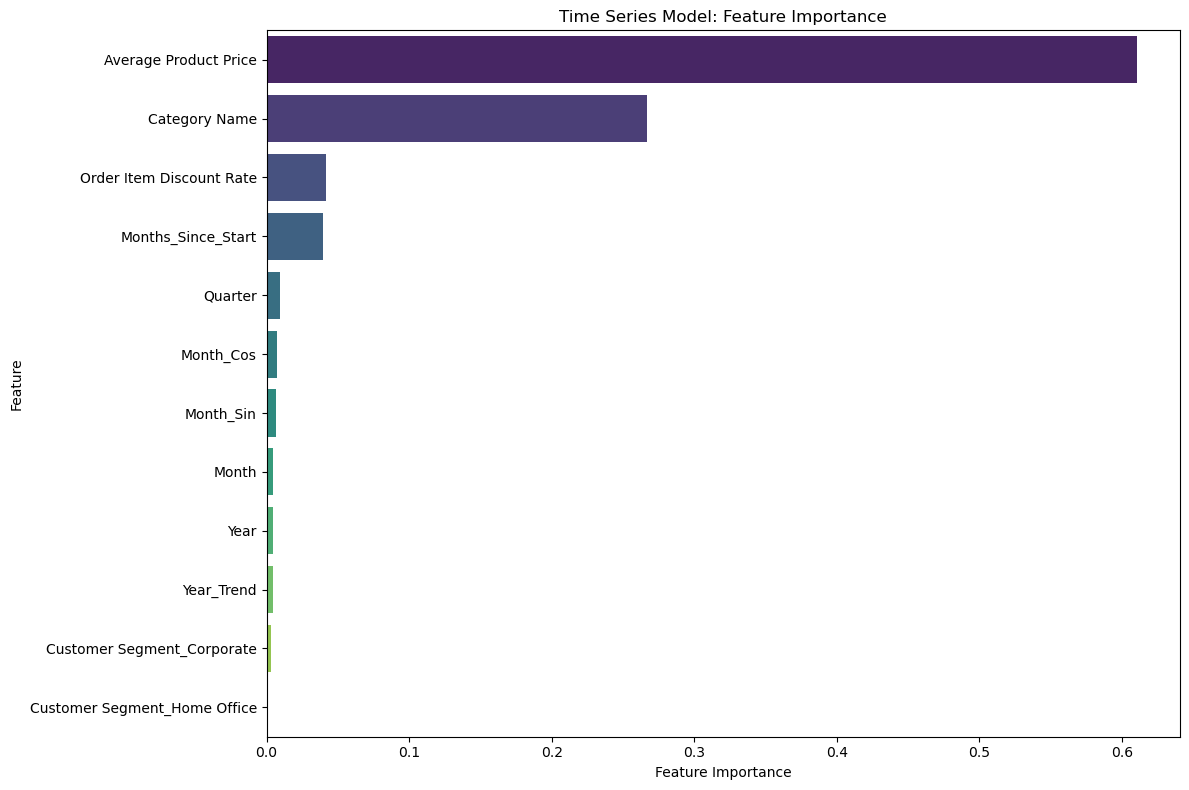

In [29]:
# Get feature importance
feature_importance = model_timeseries.feature_importances_
feature_names = X_timeseries.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("TOP 10 MOST IMPORTANT FEATURES:")
print(importance_df.head(10))

# Analyze time vs business feature importance
time_features = ['Year', 'Month', 'Quarter', 'Months_Since_Start', 'Month_Sin', 'Month_Cos', 'Year_Trend']
time_importance = importance_df[importance_df['Feature'].isin(time_features)]['Importance'].sum()
total_importance = importance_df['Importance'].sum()
time_contribution = (time_importance / total_importance) * 100

print(f"FEATURE IMPORTANCE BREAKDOWN:")
print(f"Time features contribution: {time_contribution:.1f}%")
print(f"Business features contribution: {100-time_contribution:.1f}%")

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = importance_df.head(12)
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title('Time Series Model: Feature Importance')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

#### Predicted vs Actual Plot and Residual Plot (How well the model fits the data)

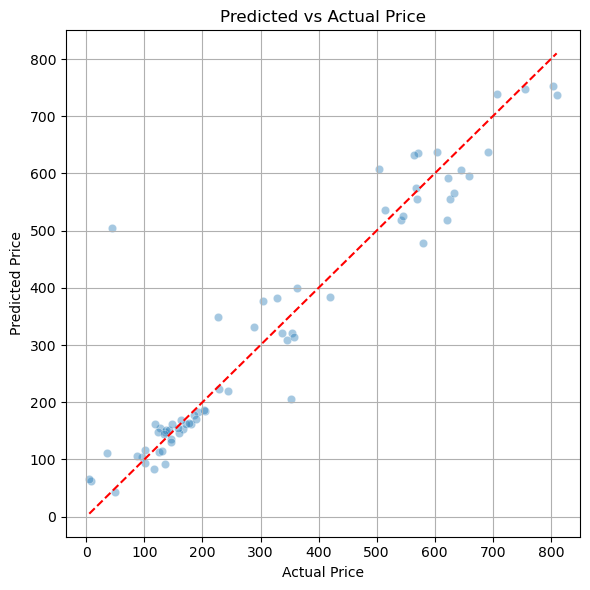

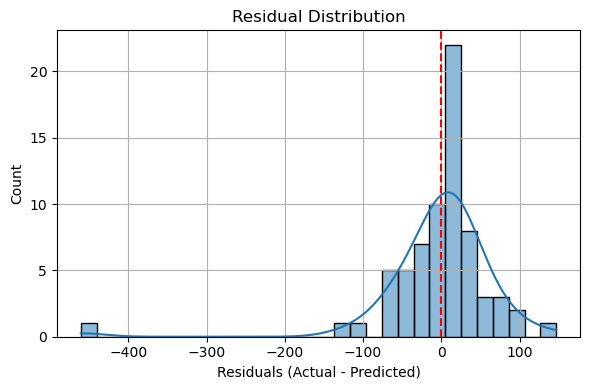

In [30]:
# 1. Predict on test set
y_pred_ts = model_timeseries.predict(X_test_ts)

# 2. Predicted vs Actual
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_ts , y=y_pred_ts, alpha=0.4)
plt.plot([y_test_ts.min(), y_test_ts.max()], [y_test_ts.min(), y_test_ts.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Residual Plot
residuals = y_test_ts - y_pred_ts
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals (Actual - Predicted)')
plt.title('Residual Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

# SAVING THE MODEL 

In [31]:
import joblib
import pickle
import os

# Create model directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save the XGBoost time series model
joblib.dump(model_timeseries, 'model/salesforecast(categories).pkl')

# Save preprocessing components
preprocessor_data = {
    'label_encoder_category': le_category,
    'feature_columns': X_timeseries.columns.tolist(),
    'reference_date': reference_date,
    'unique_categories': le_category.classes_.tolist(),
    'customer_segments': [col for col in X_timeseries.columns if 'Customer_Segment_' in col],
    'model_type': 'XGBoost_TimeSeries',
    'model_performance': {
        'r2_score': r2_ts,
        'rmse': rmse_ts,
        'mae': mae_ts,
        'mape': mape_ts
    }
}

with open('model/salesforecast_preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor_data, f)

print("✅ Model and preprocessor saved successfully!")
print("Saved files:")
print("- model/salesforecast(categories).pkl (XGBoost time series model)")
print("- model/salesforecast_preprocessor.pkl (preprocessing components)")
print(f"- Model performance: R² = {r2_ts:.4f}, MAPE = {mape_ts:.2f}%")
print(f"- Available categories: {le_category.classes_.tolist()}")

✅ Model and preprocessor saved successfully!
Saved files:
- model/salesforecast(categories).pkl (XGBoost time series model)
- model/salesforecast_preprocessor.pkl (preprocessing components)
- Model performance: R² = 0.8973, MAPE = 56.36%
- Available categories: ['Cameras', 'Camping & Hiking', 'Cardio Equipment', 'Cleats', 'Computers', 'Electronics', 'Fishing', 'Garden', 'Indoor/Outdoor Games', "Men's Footwear", 'Pet Supplies', 'Shop By Sport', 'Video Games', 'Water Sports', "Women's Apparel"]


In [ ]:
# Verify the saved files for frontend compatibility
print("🔍 VERIFYING SAVED MODEL FILES FOR FRONTEND:")
print("="*60)

# Check if files exist
import os
model_file = 'model/salesforecast(categories).pkl'
preprocessor_file = 'model/salesforecast_preprocessor.pkl'

print(f"✅ Model file exists: {os.path.exists(model_file)}")
print(f"✅ Preprocessor file exists: {os.path.exists(preprocessor_file)}")

if os.path.exists(model_file):
    print(f"   Model file size: {os.path.getsize(model_file) / (1024*1024):.2f} MB")

if os.path.exists(preprocessor_file):
    print(f"   Preprocessor file size: {os.path.getsize(preprocessor_file) / 1024:.2f} KB")

# Test loading the saved files (like the frontend will do)
try:
    print("\n🔄 Testing model loading (frontend simulation):")
    
    # Load model
    loaded_model_test = joblib.load('model/salesforecast(categories).pkl')
    print("   ✅ Model loaded successfully")
    
    # Load preprocessor
    with open('model/salesforecast_preprocessor.pkl', 'rb') as f:
        preprocessor_test = pickle.load(f)
    print("   ✅ Preprocessor loaded successfully")
    
    # Verify preprocessor contains required components
    required_keys = ['label_encoder_category', 'feature_columns', 'reference_date', 
                     'unique_categories', 'model_type', 'model_performance']
    
    print(f"\n📋 Preprocessor components:")
    for key in required_keys:
        exists = key in preprocessor_test
        print(f"   {'✅' if exists else '❌'} {key}: {exists}")
        if exists and key == 'unique_categories':
            print(f"      Categories: {len(preprocessor_test[key])} total")
            print(f"      Examples: {preprocessor_test[key][:5]}")
    
    print(f"\n🎯 FRONTEND COMPATIBILITY: {'✅ READY' if all(key in preprocessor_test for key in required_keys) else '❌ MISSING COMPONENTS'}")
    
except Exception as e:
    print(f"❌ Error loading files: {e}")

print("\n📝 TO RUN THE FRONTEND:")
print("1. Ensure you have Flask installed: pip install flask")
print("2. Run: python app_new.py")
print("3. Open browser to: http://localhost:5000")
print("4. Select a category and generate hierarchical forecasts!")